In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import imghdr
import matplotlib.image as mpimg
import random

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
GPU = tf.config.experimental.list_physical_devices('GPU')
for gpu in GPU:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
train_dir = "D:\College\Python\Project\Image_Classifier\data\data_train"
test_dir = "D:\College\Python\Project\Image_Classifier\data\data_test"
batch_size = 32
img_height = 50
img_width = 50

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


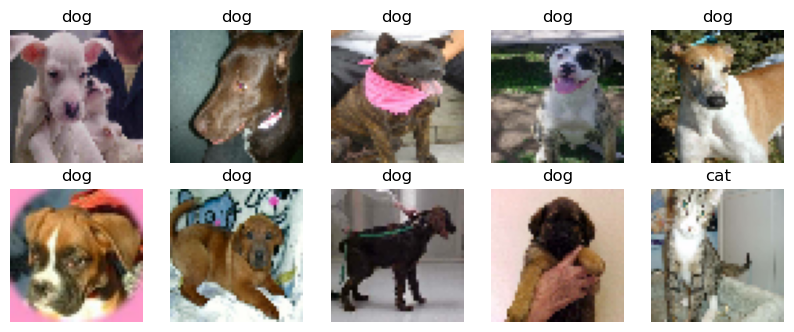

In [5]:
#Training test split
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Displaying one batch of the training data
class_names = train_ds.class_names 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
#Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

In [7]:
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 50, 50, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 15s 18ms/step - loss: 0.5847 - accuracy: 0.6745 - val_loss: 0.4997 - val_accuracy: 0.7688
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4733 - accuracy: 0.7724 - val_loss: 0.4465 - val_accuracy: 0.7910
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4194 - accuracy: 0.8079 - val_loss: 0.4287 - val_accuracy: 0.7982
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3730 - accuracy: 0.8319 - val_loss: 0.4376 - val_accuracy: 0.7938
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3245 - accuracy: 0.8589 - val_loss: 0.4775 - val_accuracy: 0.7894
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2788 - accuracy: 0.8798 - val_loss: 0.4717 - val_accuracy: 0.8088
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2465 - accuracy: 0.8939 - val_loss: 0.5086 - val_accuracy: 0.8012
Epoc

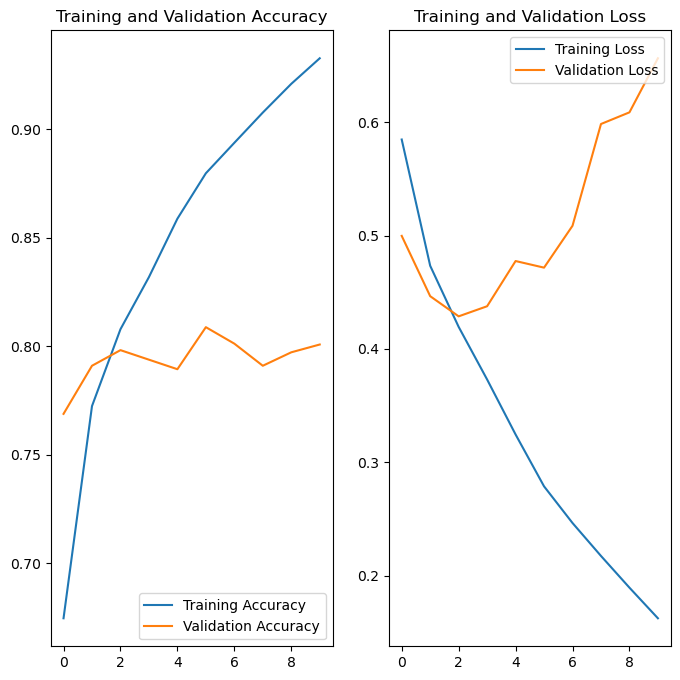

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# We can see that it is an Overfitting model
    Applying data augmentation techniques to make the network more efficient

In [17]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

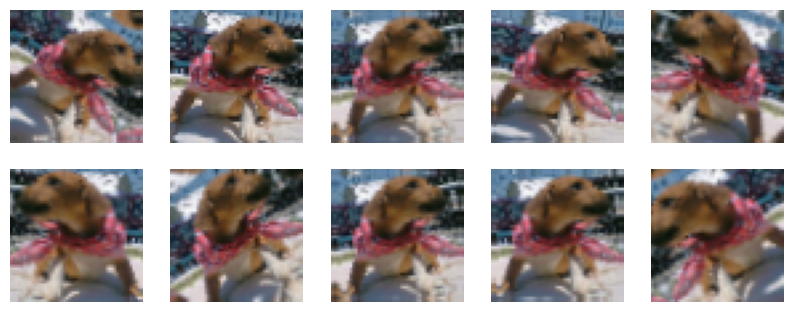

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(10):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [18]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, name="outputs")
])

In [19]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [21]:
epochs = 15
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
625/625 [==============================] - 124s 199ms/step - loss: 0.5761 - accuracy: 0.6972 - val_loss: 0.5273 - val_accuracy: 0.7402
Epoch 2/15
625/625 [==============================] - 131s 210ms/step - loss: 0.5305 - accuracy: 0.7340 - val_loss: 0.5049 - val_accuracy: 0.7600
Epoch 3/15
625/625 [==============================] - 131s 210ms/step - loss: 0.5036 - accuracy: 0.7538 - val_loss: 0.4721 - val_accuracy: 0.7740
Epoch 4/15
625/625 [==============================] - 136s 218ms/step - loss: 0.4801 - accuracy: 0.7686 - val_loss: 0.4526 - val_accuracy: 0.7876
Epoch 5/15
625/625 [==============================] - 136s 217ms/step - loss: 0.4635 - accuracy: 0.7771 - val_loss: 0.4509 - val_accuracy: 0.7878
Epoch 6/15
625/625 [==============================] - 127s 203ms/step - loss: 0.4477 - accuracy: 0.7869 - val_loss: 0.4440 - val_accuracy: 0.7926
Epoch 7/15
625/625 [==============================] - 128s 204ms/step - loss: 0.4343 - accuracy: 0.7966 - val_loss: 0.4226 -

In [ ]:
new_acc = history2.history2['accuracy']
new_val_acc = history2.history2['val_accuracy']

new_loss = history2.history2['loss']
new_val_loss = history2.history2['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
cat_url = "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg"
cat_path = tf.keras.utils.get_file('Tabby Cat', origin=cat_url)

img = tf.keras.utils.load_img(
    cat_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)